In [3]:
model = {"AA" : 0.18, "AC" : 0.274, "AG" : 0.426, "AT" : 0.12, 
         "CA" : 0.171, "CC" : 0.368, "CG" : 0.274, "CT" : 0.188, 
         "GA" : 0.161, "GC" : 0.339, "GG" : 0.375, "GT" : 0.125, 
         "TA" : 0.079, "TC": 0.355, "TG" : 0.384, "TT" : 0.182}
non_model = {"AA" : 0.3, "AC" : 0.205, "AG" : 0.285, "AT" : 0.21, 
         "CA" : 0.322, "CC" : 0.298, "CG" : 0.078, "CT" : 0.302, 
         "GA" : 0.248, "GC" : 0.246, "GG" : 0.298, "GT" : 0.208, 
         "TA" : 0.177, "TC" : 0.239, "TG" : 0.292, "TT" : 0.292}

In [4]:
a = "".join(open("generated_sequence.fa", 'r').readlines()[1:]).replace("\n", "")

In [5]:
import math as m
d = {}
for i in model:
    d[i] = m.log(model[i]/non_model[i], 2)
#d - матрица для каждой пары перехода, который заменяется умножение суммой в последующем коде марковской цепи

In [66]:
#далее для каждого отрезка в 300 нуклеотидов находится вероятность его 
import matplotlib.pyplot as plt
x = []
y = []
#print(a)
for i in range(1, 14700):
    pl = 1
   ##     print(i)
    for j in range(i+1 , i+300):
        pl += d[a[j-1] + a[j]]
    x.append(i)
    y.append(pl)

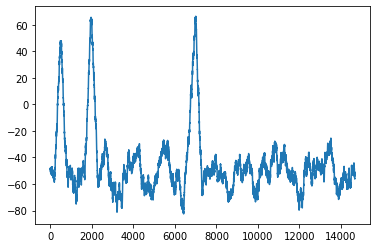

In [67]:
plt.plot(x, y)
plt.show()
#построен график вероятности относительно прошлого кода 
#на котором заметны 3 пика, необходимо найти три локальных максимума данных 

In [68]:
import numpy as np
from scipy.signal import argrelextrema

#argrelextrema(x, np.greater)
#print(ans)

In [69]:
type(argrelextrema(np.array(y), np.greater))

tuple

In [73]:
for i in list(argrelextrema(np.array(y), np.greater))[0]:
    if y[i] > 42:
        print(y[i], i)

42.69250607020091 457
43.01523584643194 467
45.4306849788897 470
46.885420428077005 473
45.97232218786707 477
46.12731707600286 479
47.11929718695745 481
48.15420466363048 485
45.63617828967958 489
46.616366865992156 493
47.246744998519446 501
47.277772547752704 505
47.77522513033769 517
47.84271414629366 519
47.748040301011464 523
46.25406287989916 528
45.14900714148072 532
46.51934476806222 1895
50.03635126399113 1902
49.90849712370767 1905
48.61878582249245 1911
61.40307711497198 1926
63.11129482167401 1929
63.90473763445757 1932
64.03952767727824 1934
64.04551052880083 1940
65.2555111232181 1943
65.33393430129645 1946
64.23374105584953 1950
62.8837381495484 1952
65.78539394882465 1957
64.74634507975085 1959
65.02184315532969 1961
64.25566561086872 1966
63.057303857933704 1968
62.93897529614618 1970
64.96920650339815 1973
64.9183669575666 1975
64.5368620590291 1978
64.47632560365392 1980
63.246442216847974 1983
64.30829345670132 1987
64.30829345670129 1989
62.43507765630745 1992
61.

In [71]:
#получается 3 локальных максимума
ans = [485, 1961, 7004]

(array([    1,     7,    14, ..., 14658, 14661, 14663], dtype=int64),)